In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [2]:
with open('./cbow.txt', 'r') as file:
    text = file.read()
    
text

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period and a shorter serial interval than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19.\n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission.\n\nThe reproductive number is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.'

## Preprocessing text

In [3]:
# Convert text to lowercase
text = text.lower()

text = text.replace('\n', '')
text = text.replace('(', '')
text = text.replace(')', '')
text = text.replace(',', '')
text = text.replace('-', '')

text

'the speed of transmission is an important point of difference between the two viruses. influenza has a shorter median incubation period and a shorter serial interval than covid19 virus. the serial interval for covid19 virus is estimated to be 56 days while for influenza virus the serial interval is 3 days. this means that influenza can spread faster than covid19.further transmission in the first 35 days of illness or potentially presymptomatic transmission is a major driver of transmission for influenza. in contrast while we are learning that there are people who can shed covid19 virus 2448 hours prior to symptom onset at present this does not appear to be a major driver of transmission.the reproductive number is understood to be between 2 and 2.5 for covid19 virus higher than for influenza. however estimates for both covid19 and influenza viruses are very context and timespecific making direct comparisons more difficult.'

In [4]:
cleaned_text = ''

for word in text:
    if not word.isdigit():
        cleaned_text += word
        
cleaned_text

'the speed of transmission is an important point of difference between the two viruses. influenza has a shorter median incubation period and a shorter serial interval than covid virus. the serial interval for covid virus is estimated to be  days while for influenza virus the serial interval is  days. this means that influenza can spread faster than covid.further transmission in the first  days of illness or potentially presymptomatic transmission is a major driver of transmission for influenza. in contrast while we are learning that there are people who can shed covid virus  hours prior to symptom onset at present this does not appear to be a major driver of transmission.the reproductive number is understood to be between  and . for covid virus higher than for influenza. however estimates for both covid and influenza viruses are very context and timespecific making direct comparisons more difficult.'

In [5]:
# Splitting the text into sentences
sentences = cleaned_text.split('. ')
sentences

['the speed of transmission is an important point of difference between the two viruses',
 'influenza has a shorter median incubation period and a shorter serial interval than covid virus',
 'the serial interval for covid virus is estimated to be  days while for influenza virus the serial interval is  days',
 'this means that influenza can spread faster than covid.further transmission in the first  days of illness or potentially presymptomatic transmission is a major driver of transmission for influenza',
 'in contrast while we are learning that there are people who can shed covid virus  hours prior to symptom onset at present this does not appear to be a major driver of transmission.the reproductive number is understood to be between  and ',
 'for covid virus higher than for influenza',
 'however estimates for both covid and influenza viruses are very context and timespecific making direct comparisons more difficult.']

In [6]:
# Tokenizing the sentences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 28, 5, 6, 7, 29, 30, 31, 5, 32, 18, 1, 33, 19], [2, 34, 9, 20, 35, 36, 37, 10, 9, 20, 12, 13, 14, 3, 8], [1, 12, 13, 4, 3, 8, 7, 38, 11, 15, 16, 21, 4, 2, 8, 1, 12, 13, 7, 16], [22, 39, 23, 2, 24, 40, 41, 14, 3, 42, 6, 25, 1, 43, 16, 5, 44, 45, 46, 47, 6, 7, 9, 26, 27, 5, 6, 4, 2], [25, 48, 21, 49, 17, 50, 23, 51, 17, 52, 53, 24, 54, 3, 8, 55, 56, 11, 57, 58, 59, 60, 22, 61, 62, 63, 11, 15, 9, 26, 27, 5, 6, 1, 64, 65, 7, 66, 11, 15, 18, 10], [4, 3, 8, 67, 14, 4, 2], [68, 69, 4, 70, 3, 10, 2, 19, 17, 71, 72, 10, 73, 74, 75, 76, 77, 78]]


In [7]:
idx2word = tokenizer.index_word
word2idx = tokenizer.word_index

print(idx2word, '\n')
print(word2idx)

{1: 'the', 2: 'influenza', 3: 'covid', 4: 'for', 5: 'of', 6: 'transmission', 7: 'is', 8: 'virus', 9: 'a', 10: 'and', 11: 'to', 12: 'serial', 13: 'interval', 14: 'than', 15: 'be', 16: 'days', 17: 'are', 18: 'between', 19: 'viruses', 20: 'shorter', 21: 'while', 22: 'this', 23: 'that', 24: 'can', 25: 'in', 26: 'major', 27: 'driver', 28: 'speed', 29: 'an', 30: 'important', 31: 'point', 32: 'difference', 33: 'two', 34: 'has', 35: 'median', 36: 'incubation', 37: 'period', 38: 'estimated', 39: 'means', 40: 'spread', 41: 'faster', 42: 'further', 43: 'first', 44: 'illness', 45: 'or', 46: 'potentially', 47: 'presymptomatic', 48: 'contrast', 49: 'we', 50: 'learning', 51: 'there', 52: 'people', 53: 'who', 54: 'shed', 55: 'hours', 56: 'prior', 57: 'symptom', 58: 'onset', 59: 'at', 60: 'present', 61: 'does', 62: 'not', 63: 'appear', 64: 'reproductive', 65: 'number', 66: 'understood', 67: 'higher', 68: 'however', 69: 'estimates', 70: 'both', 71: 'very', 72: 'context', 73: 'timespecific', 74: 'making'

## Creating contexts and targets

In [8]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100
context_size = 3

contexts = []
targets = []

for sequence in sequences:
    if len(sequence) >= 2 * context_size + 1:
        for i in range(context_size, len(sequence) - context_size):
            target = sequence[i]
            context = sequence[i-context_size:i] + sequence[i+1:i+context_size+1]
            contexts.append(context)
            targets.append(target)

print(contexts, "\n")
print(targets)

[[1, 28, 5, 7, 29, 30], [28, 5, 6, 29, 30, 31], [5, 6, 7, 30, 31, 5], [6, 7, 29, 31, 5, 32], [7, 29, 30, 5, 32, 18], [29, 30, 31, 32, 18, 1], [30, 31, 5, 18, 1, 33], [31, 5, 32, 1, 33, 19], [2, 34, 9, 35, 36, 37], [34, 9, 20, 36, 37, 10], [9, 20, 35, 37, 10, 9], [20, 35, 36, 10, 9, 20], [35, 36, 37, 9, 20, 12], [36, 37, 10, 20, 12, 13], [37, 10, 9, 12, 13, 14], [10, 9, 20, 13, 14, 3], [9, 20, 12, 14, 3, 8], [1, 12, 13, 3, 8, 7], [12, 13, 4, 8, 7, 38], [13, 4, 3, 7, 38, 11], [4, 3, 8, 38, 11, 15], [3, 8, 7, 11, 15, 16], [8, 7, 38, 15, 16, 21], [7, 38, 11, 16, 21, 4], [38, 11, 15, 21, 4, 2], [11, 15, 16, 4, 2, 8], [15, 16, 21, 2, 8, 1], [16, 21, 4, 8, 1, 12], [21, 4, 2, 1, 12, 13], [4, 2, 8, 12, 13, 7], [2, 8, 1, 13, 7, 16], [22, 39, 23, 24, 40, 41], [39, 23, 2, 40, 41, 14], [23, 2, 24, 41, 14, 3], [2, 24, 40, 14, 3, 42], [24, 40, 41, 3, 42, 6], [40, 41, 14, 42, 6, 25], [41, 14, 3, 6, 25, 1], [14, 3, 42, 25, 1, 43], [3, 42, 6, 1, 43, 16], [42, 6, 25, 43, 16, 5], [6, 25, 1, 16, 5, 44], [2

In [9]:
# Printing features with target
for i in range(5):
    words = []
    target = idx2word.get(targets[i])
    for j in contexts[i]:
        words.append(idx2word.get(j))
    print(words," -> ", target)

['the', 'speed', 'of', 'is', 'an', 'important']  ->  transmission
['speed', 'of', 'transmission', 'an', 'important', 'point']  ->  is
['of', 'transmission', 'is', 'important', 'point', 'of']  ->  an
['transmission', 'is', 'an', 'point', 'of', 'difference']  ->  important
['is', 'an', 'important', 'of', 'difference', 'between']  ->  point


## Creating training and testing data

In [10]:
X = np.array(contexts)
y = np.array(targets)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77, 6), (26, 6), (77,), (26,))

## Defining model

In [13]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2 * context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=0)

## Plottting the word embeddings

In [16]:
embeddings = model.layers[0].get_weights()[0]
embeddings

array([[ 0.01069734,  0.04694669,  0.03183729, ...,  0.02869416,
         0.0281067 ,  0.01881791],
       [-0.11716304,  0.09626372,  0.08280142, ...,  0.10986689,
         0.01649056,  0.09640652],
       [ 0.09405606, -0.09018736,  0.00063979, ...,  0.02683847,
         0.0799916 ,  0.02950428],
       ...,
       [-0.01908225, -0.0641636 , -0.00672514, ...,  0.01614283,
        -0.05297591,  0.09139159],
       [-0.05436746, -0.01977087, -0.06797397, ...,  0.05041046,
        -0.04509063,  0.08629578],
       [-0.07048895, -0.02583991, -0.00791952, ..., -0.07071558,
        -0.0528985 ,  0.01332755]], dtype=float32)

In [17]:
# Applying PCA on the embeddings
pca = PCA(n_components=2)

reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings

array([[ 0.05958562,  0.04744337],
       [-0.4283896 , -0.18524903],
       [ 0.33660084, -0.30984575],
       [ 0.23344505, -0.20667274],
       [-0.05534527, -0.2254935 ],
       [-0.3873507 , -0.02756324],
       [-0.40306333, -0.21831037],
       [-0.3452492 , -0.13558033],
       [ 0.0331508 ,  0.04689556],
       [-0.4131508 , -0.06084122],
       [ 0.08004335, -0.05229168],
       [-0.26778227,  0.09462263],
       [-0.16219074,  0.02249019],
       [-0.15998763, -0.08688637],
       [ 0.19490144, -0.2306478 ],
       [-0.3433083 , -0.15894307],
       [-0.1914195 ,  0.02281141],
       [ 0.45227012, -0.08470842],
       [-0.33064204, -0.14986786],
       [ 0.3697782 , -0.07455712],
       [-0.00998613,  0.11079293],
       [ 0.12850378, -0.05816951],
       [ 0.16255504,  0.48353896],
       [ 0.35181215, -0.07159997],
       [ 0.4146602 , -0.14720343],
       [ 0.04836112, -0.16427   ],
       [-0.5055068 , -0.14898354],
       [-0.38095754, -0.12137071],
       [-0.26023486,

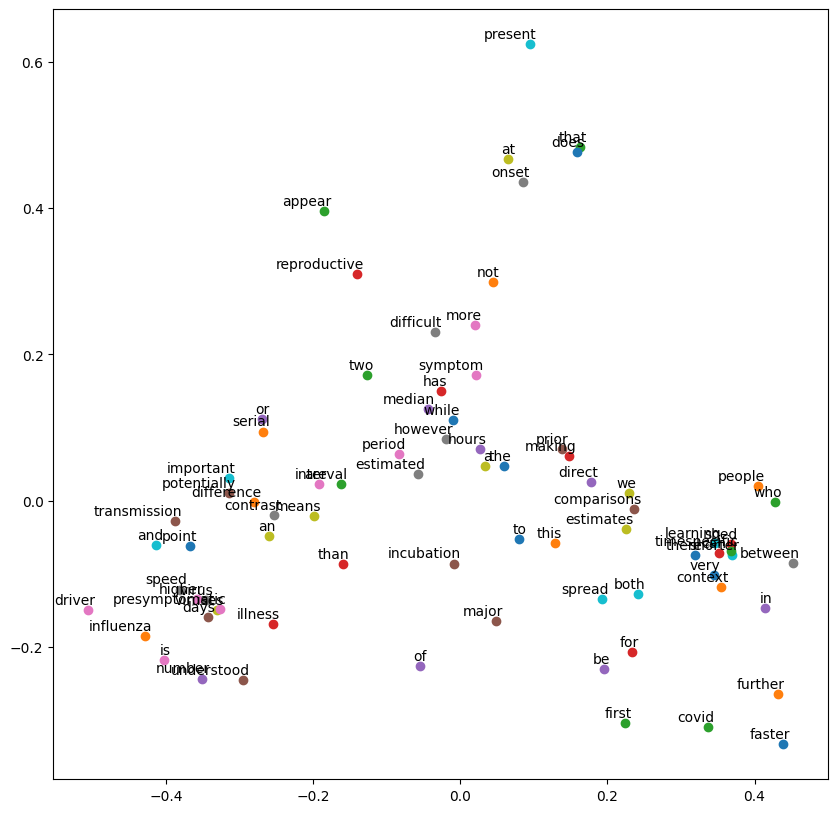

In [18]:
plt.figure(figsize=(10, 10))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

## Making predictions

In [19]:
test_words = []

for idx in X_test[0]:
    test_words.append(idx2word.get(idx))

# Reshape X_test[0] to have a batch dimension
input_data = np.expand_dims(X_test[0], axis=0)

pred = model.predict(input_data)
pred = np.argmax(pred[0])

print("pred ", test_words, "\n=", idx2word.get(pred), "\n\n")

1/1 [==============================] - 0s 78ms/step
pred  ['influenza', 'virus', 'the', 'interval', 'is', 'days'] 
= is 


